In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2014-11-27'
stock = 'GOOG'
data = yf.download(stock,start)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-28,26.956989,27.025801,26.756540,27.017324,26.986614,22966883
2014-12-01,26.871225,26.996382,26.520189,26.616922,26.586668,42307838
2014-12-02,26.602463,26.701691,26.417471,26.614429,26.584177,30533600
2014-12-03,26.499247,26.726423,26.390545,26.493263,26.463150,25559983
2014-12-04,26.485285,26.793440,26.357136,26.791943,26.761490,27842232
...,...,...,...,...,...,...
2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900
2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700


In [5]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-28,26.956989,27.025801,26.756540,27.017324,26.986614,22966883
1,2014-12-01,26.871225,26.996382,26.520189,26.616922,26.586668,42307838
2,2014-12-02,26.602463,26.701691,26.417471,26.614429,26.584177,30533600
3,2014-12-03,26.499247,26.726423,26.390545,26.493263,26.463150,25559983
4,2014-12-04,26.485285,26.793440,26.357136,26.791943,26.761490,27842232
...,...,...,...,...,...,...,...
2425,2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900
2426,2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
2427,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
2428,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900


In [6]:
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2425    166.5955
2426    167.0572
2427    167.4031
2428    167.7139
2429    168.0587
Name: Close, Length: 2430, dtype: float64

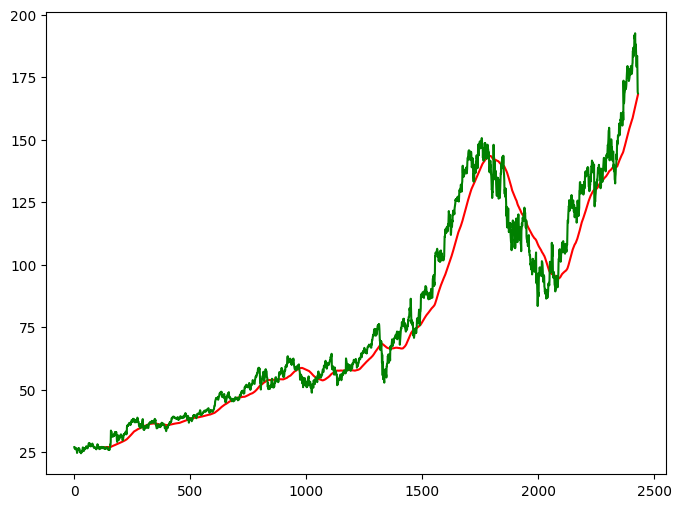

In [7]:
plt.figure(figsize =(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

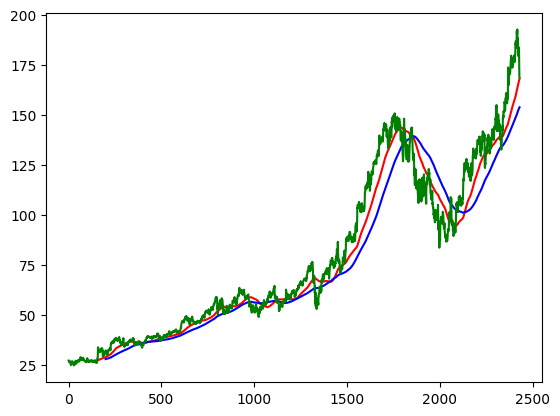

In [9]:
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
train_data = pd.DataFrame(data.Close[0:int(len(data)*0.8)])
test_data = pd.DataFrame(data.Close[int(len(data)*0.8):len(data)])

In [12]:
train_data.shape[0]

1944

In [13]:
test_data.shape[0]

486

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(train_data)

In [16]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
58/58 [==============================] - 21s 259ms/step - loss: 0.0306
Epoch 2/50
58/58 [==============================] - 16s 270ms/step - loss: 0.0070
Epoch 3/50
58/58 [==============================] - 15s 267ms/step - loss: 0.0059
Epoch 4/50
58/58 [==============================] - 15s 261ms/step - loss: 0.0053
Epoch 5/50
58/58 [==============================] - 20s 339ms/step - loss: 0.0048
Epoch 6/50
58/58 [==============================] - 15s 261ms/step - loss: 0.0051
Epoch 7/50
58/58 [==============================] - 15s 259ms/step - loss: 0.0047
Epoch 8/50
58/58 [==============================] - 15s 260ms/step - loss: 0.0041
Epoch 9/50
58/58 [==============================] - 15s 260ms/step - loss: 0.0039
Epoch 10/50
58/58 [==============================] - 15s 259ms/step - loss: 0.0042
Epoch 11/50
58/58 [==============================] - 15s 262ms/step - loss: 0.0037
Epoch 12/50
58/58 [==============================] - 15s 265ms/step - loss: 0.0039
Epoch 13/50
5

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = train_data.tail(100)

In [25]:
data_test = pd.concat([pas_100_days,test_data],ignore_index =True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [28]:
y_pred = model.predict(x)

16/16 [==============================] - 2s 70ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_pred = y_pred*scale
y_test = y*scale

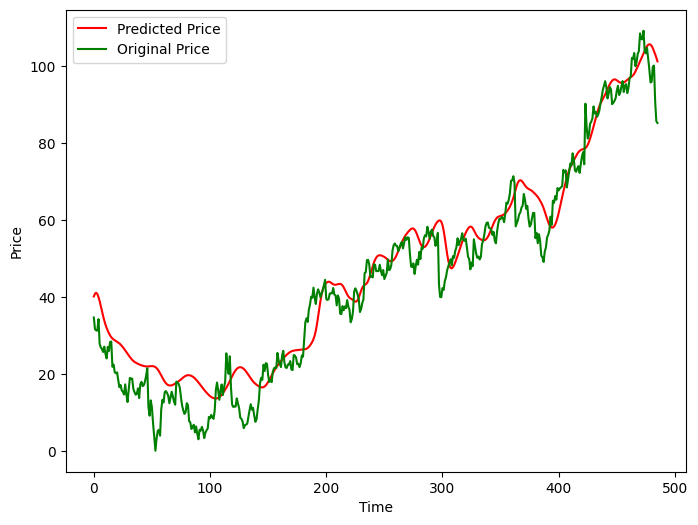

In [32]:
plt.figure(figsize=(8,6))
plt.plot(y_pred,'r', label = 'Predicted Price')
plt.plot(y_test,'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions LSTM')